# Comunicações e Processamento de Sinal (CPS)
## Semana 4 
## Modulações Digitais

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#np.random.seed(0)
#mensagem = np.array([0,1,1,0,1,0,0,1,1])
mensagem = np.random.randint(0,2, 100)
#randint(low, high=None, size=None, dtype=int)
#Return random integers from `low` (inclusive) to `high` (exclusive).

In [4]:
mensagem

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

# PSK - Phase Shift Keying

$ s_1(t) = A \cos(2 \pi f_c t), 0< t < T_b$

$ s_0(t) = A \cos(2 \pi f_c t) = -A \cos(2 \pi f_c t), 0< t < T_b$

$ s_1(t) = A \phi(t) $

$ s_0(t) = -A \phi(t) $

$ \phi(t) = \cos(2 \pi f_c t), 0 < t < T_b $

In [6]:
#### CRIAR SINAL s0 e s1 que codificam bit 0 e bit 1 ####
#########################################################
fc = 400 #Hz
# Tb - tempo para transmitir 1 bit
Tb = 3 * 1/fc  # assumir 3 periodos da sinusoide
A = 2
Fs = 4000 # Fs >> 2 fmax -> Teo da Amostragem
t = np.arange(0,Tb, 1/Fs)
phi = np.cos(2*np.pi*fc*t)
Sinal1 = A * phi # sinal para o 1
Sinal0 = -A * phi  # sinal para o 0
N = len(t)

In [7]:
#plt.plot(Sinal0)
#plt.plot(Sinal1)
N

30

In [8]:
sinal = np.zeros(len(mensagem)*N) # array onde vamos guardar o sinal a enviar
for i in range(len(mensagem)):
    if mensagem[i] == 1:
        sinal[i*N:(i+1)*N] = Sinal1
    else:
        sinal[i*N:(i+1)*N] = Sinal0

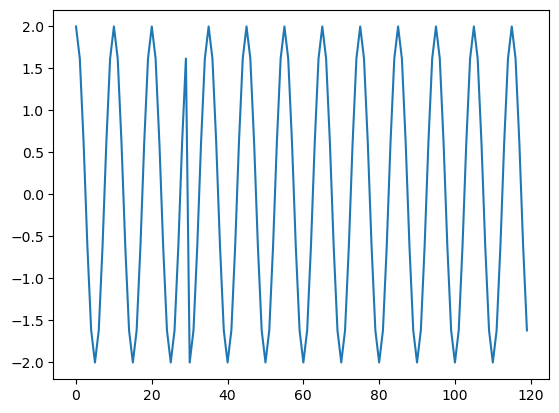

In [9]:
plt.plot(sinal[0:4*N])

# Canal de Comunicação

## Gerar ruido que segue uma distribuição Gaussiana

In [11]:
desvioPadrao = 3
ruido = desvioPadrao*np.random.randn(len(sinal))

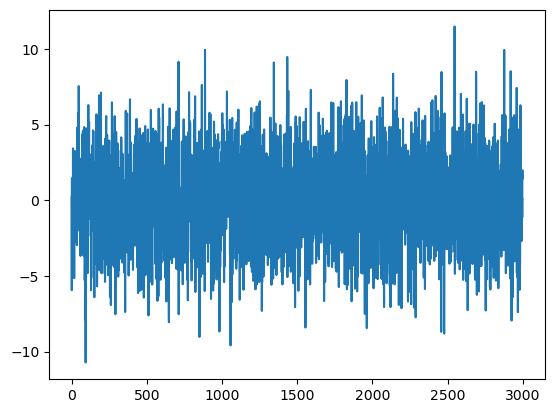

In [12]:
plt.plot(ruido)

In [13]:
np.mean(ruido)

-0.0004772998015201253

In [14]:
np.std(ruido)

2.9644036311514115

plt.hist(ruido, bins = 50)

In [16]:
y = sinal + ruido

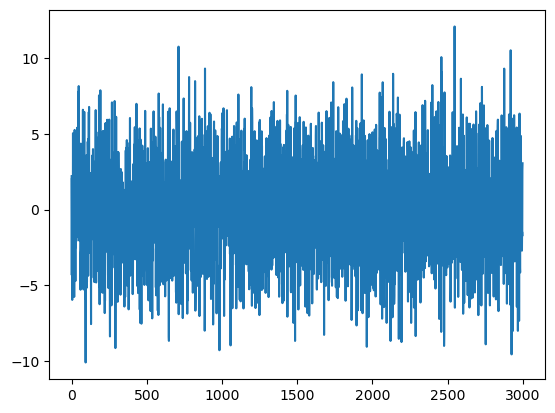

In [17]:
plt.plot(y)

# Receptor - Filtro Adaptado

In [19]:
decisoes = np.zeros(len(mensagem))
arrayMs = np.zeros(len(mensagem))
for indice in range(0,len(y),N):
    #print(indice)
    m = np.sum( y[indice:indice+N] * phi) #?!?!?! produto interno?
    #print(m)
    arrayMs[int(indice/N)] = m
    if m > 30:
        decisoes[int(indice/N)] = 1

(array([ 2.,  4.,  2., 12., 10.,  6.,  7.,  2.,  1.,  2.,  2.,  1.,  4.,
         4.,  9., 13.,  4.,  6.,  3.,  6.]),
 array([-48.45537063, -43.39684191, -38.33831319, -33.27978447,
        -28.22125575, -23.16272703, -18.10419831, -13.04566959,
         -7.98714087,  -2.92861215,   2.12991657,   7.18844529,
         12.24697401,  17.30550273,  22.36403145,  27.42256017,
         32.48108889,  37.53961761,  42.59814633,  47.65667505,
         52.71520377]),
 <BarContainer object of 20 artists>)

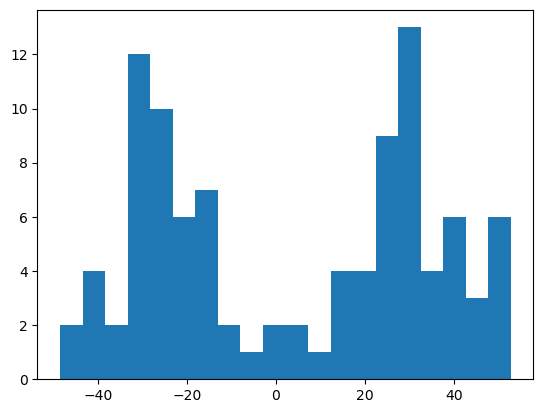

In [20]:
plt.hist(arrayMs,bins=20)

In [21]:
decisoes == mensagem

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False])

# Analise das Potencias

In [29]:
Ebit = np.sum((sinal[0:N]) ** 2)
Pbit = np.sum((sinal[0:N]) ** 2) / N
print("Energia:", Ebit, ", Potencia:", Pbit)

Energia: 59.99999999999999 , Potencia: 1.9999999999999998


In [30]:
Pruido = np.sum((ruido**2))/len(ruido)
print("PotenciaRuido: ", Pruido)

PotenciaRuido:  8.787689116198775


In [45]:
SNR = Pbit/Pruido
SNR

0.22759111907057594